<a href="https://colab.research.google.com/github/eadigun24/Diabetes_Admission_Analysis/blob/gustav/Readmissions_(D2)_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/drive')

# URL for Google Drive direct download
file_url = 'https://drive.google.com/uc?export=download&id=1e5jGdztnTLOZ-aCu1_ci19VVVtwY38vW'

# read_csv call (with proper delimiter and arguments)
data = pd.read_csv(file_url, delimiter=',', engine='python')

# Display the first few rows of the data
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
print(data.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [ ]:
# Convert 'readmitted' to numeric values
data['readmitted'] = data['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})

# Check the target values after conversion
print(data['readmitted'].unique())

# Extract the target variable and features
y = data['readmitted']
X = data.drop('readmitted', axis=1)

[0 1]


In [ ]:
# Extract the target variable 'readmitted'
y = data['readmitted']

# Drop 'readmitted' from the feature set
X = data.drop('readmitted', axis=1)

In [ ]:
# One-hot encode the feature set
X_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the model architecture
model = Sequential()

# Input layer and first hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output Layer for Binary Classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss function for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
input_nodes = len(X.columns)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_nodes)) #  ----- First Layer
model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=input_nodes)) #  ----- Second Layer
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid", input_dim=input_nodes)) # --- Output

model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 15)                  │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,006 (3.93 KB)

 Trainable params: 1,006 (3.93 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5663 - loss: 0.7358 - val_accuracy: 0.6163 - val_loss: 0.6523
Epoch 2/30
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6371 - loss: 0.6380 - val_accuracy: 0.6248 - val_loss: 0.6495
Epoch 3/30
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6539 - loss: 0.6208 - val_accuracy: 0.6281 - val_loss: 0.6507
Epoch 4/30
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6591 - loss: 0.6136 - val_accuracy: 0.6283 - val_loss: 0.6559
Epoch 5/30
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6735 - loss: 0.5988 - val_accuracy: 0.6249 - val_loss: 0.6568
Epoch 6/30
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6803 - loss: 0.5867 - val_accuracy: 0.6235 - val_loss: 0.6645
Epoch 7/30
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.6889 - loss: 0.5715 - val_accuracy: 0.6212 - val_loss: 0.6817
Epoch 8/30
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6958 - loss: 0

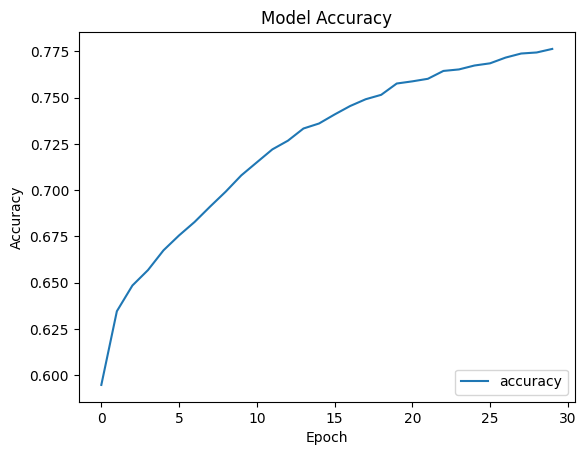

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()